# 인터넷 서비스 유형에 따른 고객 이탈 원인 분석 및 이탈 방지 전략 제안

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("통신사고객이탈\data\cust_data_v1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
DATA_PATH = "cust_data_v1.csv"
OUT_DIR = "outputs"
FIG_DIR = os.path.join(OUT_DIR, "figures")
TAB_DIR = os.path.join(OUT_DIR, "tables")

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)


In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,NaN,0.0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
# 결측치 확인
na = df.isna().mean().sort_values(ascending=False)
na.to_csv(os.path.join(TAB_DIR, "missing_rate.csv"), encoding="utf-8-sig")
print("\n=== Missing rate (top) ===")
print(na.head(10))


=== Missing rate (top) ===
DeviceProtection    0.491694
gender              0.001278
PhoneService        0.000426
Dependents          0.000284
SeniorCitizen       0.000142
MonthlyCharges      0.000142
PaymentMethod       0.000142
Contract            0.000142
customerID          0.000000
StreamingTV         0.000000
dtype: float64


In [14]:
# TotalCharges: 문자열 -> 숫자 (공백/이상값은 NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Churn: Yes/No -> 1/0
df["ChurnFlag"] = df["Churn"].map({"Yes": 1, "No": 0})

# InternetService 분석 대상(DSL vs Fiber optic)만 필터
df_if = df[df["InternetService"].isin(["DSL", "Fiber optic"])].copy()

# 분석에 꼭 필요한 컬럼만 남기고, 필요한 곳만 결측 처리(간단한 버전)
need_cols = ["InternetService", "Contract", "MonthlyCharges", "tenure", "ChurnFlag"]
df_if = df_if[need_cols].dropna(subset=["InternetService", "Contract", "MonthlyCharges", "tenure", "ChurnFlag"])

print("\n=== Filtered (DSL/Fiber) shape ===", df_if.shape)



=== Filtered (DSL/Fiber) shape === (5515, 5)


In [15]:
#Fiber vs DSL 이탈률(전체)
overall = (
    df_if.groupby("InternetService")["ChurnFlag"]
    .agg(n="count", churn_rate="mean")
    .reset_index()
)

overall["churn_rate"] = (overall["churn_rate"] * 100).round(1)
overall.to_csv(os.path.join(TAB_DIR, "churn_by_internetservice.csv"), index=False, encoding="utf-8-sig")
print("\n=== Churn rate by InternetService ===")
print(overall)


=== Churn rate by InternetService ===
  InternetService     n  churn_rate
0             DSL  2419        19.0
1     Fiber optic  3096        41.9


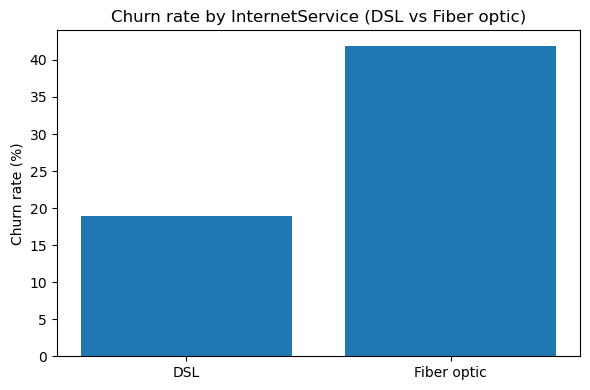

In [28]:
# 막대그래프 저장
plt.figure(figsize=(6, 4))
plt.bar(overall["InternetService"], overall["churn_rate"])
plt.title("Churn rate by InternetService (DSL vs Fiber optic)")
plt.ylabel("Churn rate (%)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "churn_by_internetservice.png"), dpi=200)


In [17]:
# 4) Contract로 통제: 계약별 Fiber vs DSL 이탈률
# =========================
by_contract = (
    df_if.groupby(["Contract", "InternetService"])["ChurnFlag"]
    .agg(n="count", churn_rate="mean")
    .reset_index()
)
by_contract["churn_rate"] = (by_contract["churn_rate"] * 100).round(1)
by_contract.to_csv(os.path.join(TAB_DIR, "churn_by_contract_and_internetservice.csv"), index=False, encoding="utf-8-sig")
print("\n=== Churn rate by Contract & InternetService ===")
print(by_contract.sort_values(["Contract", "InternetService"]))


=== Churn rate by Contract & InternetService ===
         Contract InternetService     n  churn_rate
0  Month-to-month             DSL  1221        32.3
1  Month-to-month     Fiber optic  2128        54.6
2        One year             DSL   570         9.3
3        One year     Fiber optic   539        19.3
4        Two year             DSL   628         1.9
5        Two year     Fiber optic   429         7.2


In [19]:
# 계약별 막대그래프(간단히 한 그림에)
contracts = ["Month-to-month", "One year", "Two year"]
plt.figure(figsize=(8, 4))

x = np.arange(len(contracts))
width = 0.35

dsl_rates = []
fiber_rates = []

for c in contracts:
    dsl = by_contract[(by_contract["Contract"] == c) & (by_contract["InternetService"] == "DSL")]
    fib = by_contract[(by_contract["Contract"] == c) & (by_contract["InternetService"] == "Fiber optic")]
    dsl_rates.append(float(dsl["churn_rate"].iloc[0]) if len(dsl) else np.nan)
    fiber_rates.append(float(fib["churn_rate"].iloc[0]) if len(fib) else np.nan)



<Figure size 800x400 with 0 Axes>

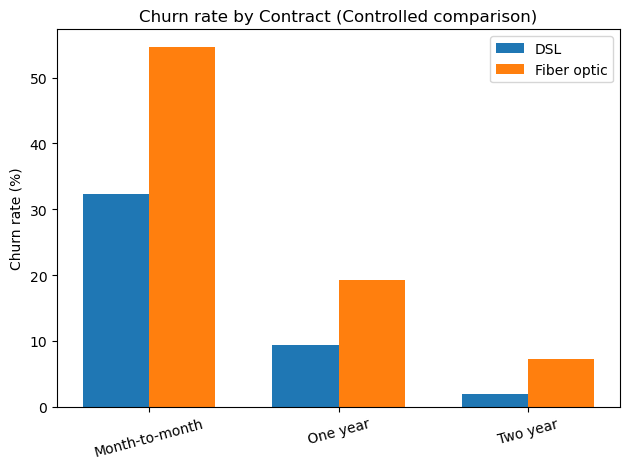

In [27]:
plt.bar(x - width/2, dsl_rates, width, label="DSL")
plt.bar(x + width/2, fiber_rates, width, label="Fiber optic")
plt.xticks(x, contracts, rotation=15)
plt.ylabel("Churn rate (%)")
plt.title("Churn rate by Contract (Controlled comparison)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "churn_by_contract_controlled.png"), dpi=200)


In [30]:
#5) 월요금 분포 비교: Fiber vs DSL
# =========================
charges_desc = (
    df_if.groupby("InternetService")["MonthlyCharges"]
    .describe()[["count", "mean", "50%", "25%", "75%", "min", "max"]]
    .round(2)
    .reset_index()
)
charges_desc.to_csv(os.path.join(TAB_DIR, "monthlycharges_desc_by_internetservice.csv"), index=False, encoding="utf-8-sig")
print("\n=== MonthlyCharges summary (DSL vs Fiber) ===")
print(charges_desc)



=== MonthlyCharges summary (DSL vs Fiber) ===
  InternetService   count   mean    50%    25%     75%    min     max
0             DSL  2419.0  58.12  56.15  46.20   69.90  23.45   94.80
1     Fiber optic  3096.0  91.50  91.68  80.55  101.15  67.75  118.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_10408\3515251692.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["DSL", "Fiber optic"])


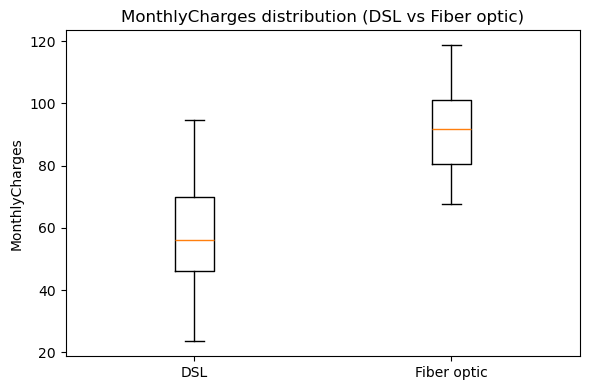

In [32]:

# 박스플롯 (분포 비교)
plt.figure(figsize=(6, 4))
data = [
    df_if[df_if["InternetService"] == "DSL"]["MonthlyCharges"],
    df_if[df_if["InternetService"] == "Fiber optic"]["MonthlyCharges"],
]
plt.boxplot(data, labels=["DSL", "Fiber optic"])
plt.title("MonthlyCharges distribution (DSL vs Fiber optic)")
plt.ylabel("MonthlyCharges")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "monthlycharges_boxplot.png"), dpi=200)


In [33]:
# 6) Fiber 초기(0–6개월) 집중 분석
# =========================
def churn_rate(sub_df):
    return (sub_df["ChurnFlag"].mean() * 100).round(1), len(sub_df)

fiber = df_if[df_if["InternetService"] == "Fiber optic"].copy()
dsl = df_if[df_if["InternetService"] == "DSL"].copy()

fiber_0_6 = fiber[fiber["tenure"].between(0, 6)]
dsl_0_6 = dsl[dsl["tenure"].between(0, 6)]

fiber_rate_0_6, fiber_n_0_6 = churn_rate(fiber_0_6)
dsl_rate_0_6, dsl_n_0_6 = churn_rate(dsl_0_6)

In [34]:
# 같은 조건(월단위 & 0–6개월)로도 비교
fiber_mm_0_6 = fiber[(fiber["Contract"] == "Month-to-month") & (fiber["tenure"].between(0, 6))]
dsl_mm_0_6 = dsl[(dsl["Contract"] == "Month-to-month") & (dsl["tenure"].between(0, 6))]

fiber_mm_rate, fiber_mm_n = churn_rate(fiber_mm_0_6)
dsl_mm_rate, dsl_mm_n = churn_rate(dsl_mm_0_6)

initial_tbl = pd.DataFrame([
    {"segment": "Fiber optic (tenure 0-6)", "n": fiber_n_0_6, "churn_rate_%": fiber_rate_0_6},
    {"segment": "DSL (tenure 0-6)", "n": dsl_n_0_6, "churn_rate_%": dsl_rate_0_6},
    {"segment": "Fiber optic (Month-to-month & tenure 0-6)", "n": fiber_mm_n, "churn_rate_%": fiber_mm_rate},
    {"segment": "DSL (Month-to-month & tenure 0-6)", "n": dsl_mm_n, "churn_rate_%": dsl_mm_rate},
])

initial_tbl.to_csv(os.path.join(TAB_DIR, "fiber_initial_churn_analysis.csv"), index=False, encoding="utf-8-sig")
print("\n=== Initial churn focus (0-6 months) ===")
print(initial_tbl)


=== Initial churn focus (0-6 months) ===
                                     segment    n  churn_rate_%
0                   Fiber optic (tenure 0-6)  620          74.2
1                           DSL (tenure 0-6)  509          48.3
2  Fiber optic (Month-to-month & tenure 0-6)  619          74.2
3          DSL (Month-to-month & tenure 0-6)  494          49.6


In [35]:
#인터넷 서비스 이용 유무의 비율과 평균 요금 

df["InternetService"] = df["InternetService"].astype(str).str.strip()
df["PhoneService"] = df["PhoneService"].astype(str).str.strip()

# 2) InternetService = "No" 인원/비율
no_mask = df["InternetService"] == "No"
no_count = int(no_mask.sum())
total_count = len(df)
no_ratio = no_count / total_count

print(f"[InternetService=No] 인원: {no_count} / {total_count} ({no_ratio:.2%})")

# 3) InternetService = "No" 평균 월요금(MonthlyCharges)
no_avg_monthly = df.loc[no_mask, "MonthlyCharges"].mean()
print(f"[InternetService=No] 평균 월요금(MonthlyCharges): {no_avg_monthly:.2f}")

# 4) InternetService != "No" (인터넷 이용자: DSL/Fiber) 평균 월요금
yes_mask = df["InternetService"] != "No"
yes_avg_monthly = df.loc[yes_mask, "MonthlyCharges"].mean()
print(f"[InternetService!=No] 평균 월요금(MonthlyCharges): {yes_avg_monthly:.2f}")

# (참고) DSL/Fiber 각각 평균 월요금도 같이 보고 싶으면
avg_by_type = df.loc[yes_mask].groupby("InternetService")["MonthlyCharges"].mean().round(2)
print("\n[참고] InternetService 유형별 평균 월요금")
print(avg_by_type)

# 5) InternetService=No 중 PhoneService 이용 비율
no_phone_ratio = (df.loc[no_mask, "PhoneService"] == "Yes").mean()
print(f"\n[InternetService=No] 중 PhoneService=Yes 비율: {no_phone_ratio:.2%}")

# (참고) InternetService=No 중 PhoneService 분포
no_phone_dist = df.loc[no_mask, "PhoneService"].value_counts(dropna=False)
print("\n[참고] InternetService=No 중 PhoneService 분포")
print(no_phone_dist)

[InternetService=No] 인원: 1526 / 7043 (21.67%)
[InternetService=No] 평균 월요금(MonthlyCharges): 21.08
[InternetService!=No] 평균 월요금(MonthlyCharges): 76.85

[참고] InternetService 유형별 평균 월요금
InternetService
DSL            58.1
Fiber optic    91.5
Name: MonthlyCharges, dtype: float64

[InternetService=No] 중 PhoneService=Yes 비율: 100.00%

[참고] InternetService=No 중 PhoneService 분포
PhoneService
Yes    1526
Name: count, dtype: int64


In [37]:
# 인터넷 여부(Yes=DSL/Fiber, No=No)
df["InternetYN"] = np.where(df["InternetService"] == "No", "No", "Yes")

# 요약 테이블 만들기
summary = (
    df.groupby("InternetYN")
      .agg(
          n=("InternetYN", "size"),
          avg_monthly=("MonthlyCharges", "mean"),
          phone_yes_rate=("PhoneService", lambda s: (s == "Yes").mean())
      )
      .reset_index()
)

summary["share"] = summary["n"] / summary["n"].sum()
summary["avg_monthly"] = summary["avg_monthly"].round(2)
summary["phone_yes_rate"] = (summary["phone_yes_rate"] * 100).round(1)
summary["share"] = (summary["share"] * 100).round(1)

summary

,InternetYN,n,avg_monthly,phone_yes_rate,share
0,No,1526,21.08,100.0,21.7
1,Yes,5517,76.85,87.6,78.3


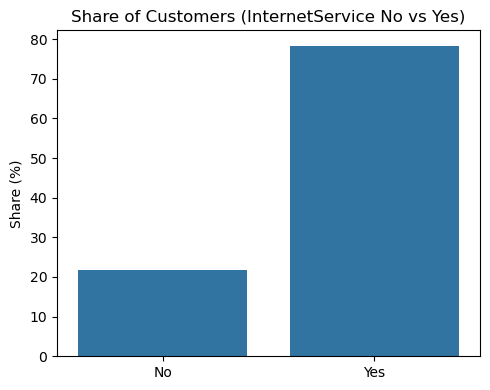

In [ ]:
# InternetService No vs Yes 비율 막대그래프

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.barplot(data=summary, x="InternetYN", y="share")
plt.title("Share of Customers (InternetService No vs Yes)")
plt.ylabel("Share (%)")
plt.xlabel("")
plt.tight_layout()
plt.show()

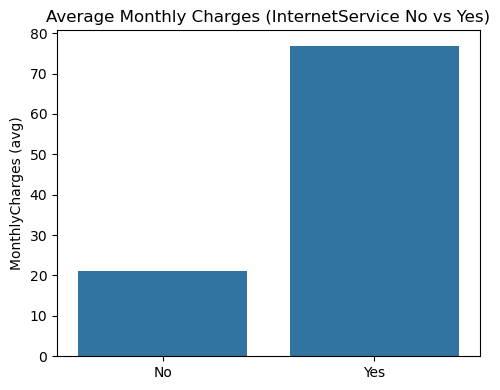

In [ ]:
#평균 월요금 비교 막대그래프

plt.figure(figsize=(5,4))
sns.barplot(data=summary, x="InternetYN", y="avg_monthly")
plt.title("Average Monthly Charges (InternetService No vs Yes)")
plt.ylabel("MonthlyCharges (avg)")
plt.xlabel("")
plt.tight_layout()
plt.show()

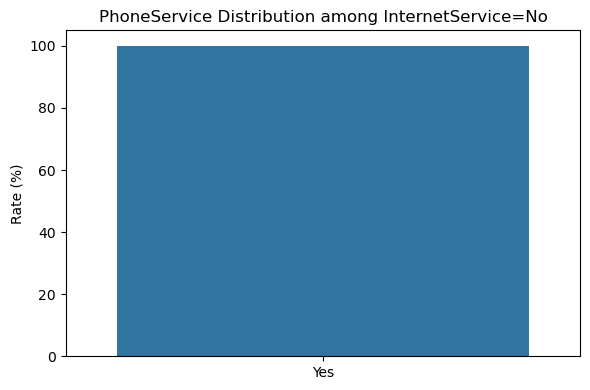

In [40]:
# InternetService=No 고객의 PhoneService 이용 비율(막대)

no_phone = (df[df["InternetYN"]=="No"]["PhoneService"]
            .value_counts(normalize=True) * 100).reset_index()
no_phone.columns = ["PhoneService", "rate"]

plt.figure(figsize=(6,4))
sns.barplot(data=no_phone, x="PhoneService", y="rate")
plt.title("PhoneService Distribution among InternetService=No")
plt.ylabel("Rate (%)")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [41]:
# 비율/평균요금/전화비율을 한 번에 보기

import plotly.express as px

fig1 = px.bar(summary, x="InternetYN", y="share",
              title="Share of Customers (InternetService No vs Yes)",
              text="share")
fig1.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig1.update_yaxes(title="Share (%)")
fig1.show()

fig2 = px.bar(summary, x="InternetYN", y="avg_monthly",
              title="Average Monthly Charges (InternetService No vs Yes)",
              text="avg_monthly")
fig2.update_traces(textposition="outside")
fig2.update_yaxes(title="Avg MonthlyCharges")
fig2.show()

fig3 = px.bar(no_phone, x="PhoneService", y="rate",
              title="PhoneService Distribution among InternetService=No",
              text="rate")
fig3.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
fig3.update_yaxes(title="Rate (%)")
fig3.show()